# Workout Analysis
Great workout! Here is your summary. 

In [1]:
import pandas as pd 

# EXTRACT 
df_sets = pd.read_csv("data/FactSets.csv")
# df_sets.head(5)
# df_measures = pd.read_csv("FactLagMeasures-FactLagMeasures.csv")
df_sets = df_sets.fillna(0)

In [2]:
# TRANSFORM
# Group the data by 'Date' and 'Exercise' and assign a unique session ID
df_sets['Session'] = df_sets.groupby(['Date']).ngroup()
df_sets['Volume'] = df_sets['Load'] * df_sets['Repetitions']

## History

---

### Max Lifts

In [3]:
# Assuming your DataFrame is named 'df_sets'
# Filter the DataFrame based on desired exercises
filtered_df = df_sets[df_sets['Exercise'].isin(['Squat', 'Deadlift', 'Press', 'Bench'])]

# Define the desired order of exercises
exercise_order = ['Deadlift', 'Squat', 'Bench', 'Press']

# Group by 'Exercise' and find the maximum 'Load' value and corresponding 'Date' for each exercise
max_load_df = filtered_df.groupby('Exercise').apply(lambda x: x.loc[x['Load'].idxmax()])[['Exercise', 'Load', 'Date']].reindex(exercise_order).reset_index(drop=True)
max_load_df['Max Load KG'] = max_load_df['Load'] / 2.2
max_load_df['Max Load KG'] = max_load_df['Max Load KG'].round(2)

max_load_df = max_load_df.reindex(columns=['Exercise', 'Load', 'Max Load KG', 'Date'])

# Rename the 'Load' column to indicate it contains the maximum value
max_load_df = max_load_df.rename(columns={'Load': 'Max Load LB'})
transposed_df = max_load_df.T

# Print the resulting table
# Set the first row as the header
transposed_df = transposed_df.set_axis(transposed_df.iloc[0], axis=1)

# Drop the first row after setting it as the header
transposed_df = transposed_df[1:]
transposed_df

Exercise,Deadlift,Squat,Bench,Press
Max Load LB,330.0,285.0,210.0,125.0
Max Load KG,150.0,129.55,95.45,56.82
Date,2023-01-05,2022-12-24,2022-12-24,2022-09-23


## Progress Over Time 

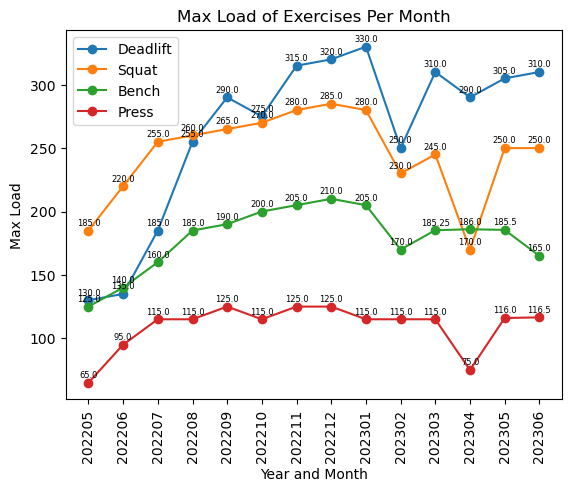

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df_sets'
# Filter the DataFrame based on desired exercises
filtered_df = df_sets[df_sets['Exercise'].isin(['Squat', 'Deadlift', 'Press', 'Bench'])].copy()

# Convert 'Date' column to datetime type
filtered_df['Date'] = pd.to_datetime(filtered_df['Date']).copy()

# Extract year and month from 'Date' column
filtered_df['YearMonth'] = filtered_df['Date'].dt.strftime('%Y%m').copy()

# Define the desired order of exercises
exercise_order = ['Deadlift', 'Squat', 'Bench', 'Press']

# Group by 'YearMonth' and 'Exercise' and calculate the maximum 'Load' value
grouped_df = filtered_df.groupby(['YearMonth', 'Exercise'])['Load'].max().reset_index()

# Create separate plots for each exercise
for exercise in exercise_order:
    exercise_data = grouped_df[grouped_df['Exercise'] == exercise]
    plt.plot(exercise_data['YearMonth'], exercise_data['Load'], label=exercise, marker='o')

    # Add data values to the plot with slight y-coordinate adjustment
    for i, load in enumerate(exercise_data['Load']):
        plt.text(exercise_data['YearMonth'].iloc[i], load + 4, str(load), ha='center', fontsize=6)

# Set plot labels and legend
plt.xlabel('Year and Month')
plt.ylabel('Max Load')
plt.title('Max Load of Exercises Per Month')
plt.legend()

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Show the plot
plt.show()


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_max_load_by_year_month(df_sets, exercise):
    # Filter the DataFrame based on the desired exercise
    filtered_df = df_sets[df_sets['Exercise'] == exercise].copy()

    # Convert 'Date' column to datetime type
    filtered_df['Date'] = pd.to_datetime(filtered_df['Date']).copy()

    # Extract year and month from 'Date' column
    filtered_df['YearMonth'] = filtered_df['Date'].dt.strftime('%Y%m').copy()

    # Group by 'YearMonth' and 'Exercise' and calculate the maximum 'Load' value
    grouped_df = filtered_df.groupby(['YearMonth', 'Exercise'])['Load'].max().reset_index()

    # Create the plot
    plt.plot(grouped_df['YearMonth'], grouped_df['Load'], label=exercise, marker='o')

    # Add data values to the plot with slight y-coordinate adjustment
    for i, load in enumerate(grouped_df['Load']):
        plt.text(grouped_df['YearMonth'].iloc[i], load + 2, str(load), ha='center', fontsize=6)

    # Calculate and plot the trend line
    x = np.arange(len(grouped_df['YearMonth']))
    y = grouped_df['Load']
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(grouped_df['YearMonth'], p(x), color='red', linestyle='--')

    # Set plot labels and legend
    plt.xlabel('Month')
    plt.ylabel('Max Load')
    plt.title(f'Max Load of {exercise} Per Month')
    plt.legend()

    # Rotate x-axis labels vertically
    plt.xticks(rotation='vertical')

    # Show the plot
    plt.show()

def plot_max_lift_change_per_year_month(df_sets, exercise):
    filtered_df = df_sets[df_sets['Exercise'] == exercise].copy()

    # Convert 'Date' column to datetime type
    filtered_df['Date'] = pd.to_datetime(filtered_df['Date']).copy()

    # Extract year and month from 'Date' column
    filtered_df['YearMonth'] = filtered_df['Date'].dt.strftime('%Y%m').copy()

    # Calculate the maximum lift per year month
    max_lift_per_year_month = filtered_df.groupby('YearMonth')['Load'].max().reset_index()
    max_lift_per_year_month['diff'] = max_lift_per_year_month['Load'].diff()
    max_lift_per_year_month = max_lift_per_year_month.fillna(0)

    # Set color based on positive/negative changes
    colors = np.where(max_lift_per_year_month['diff'] >= 0, 'green', 'red')

    # Create a bar graph for the change in lift
    plt.bar(max_lift_per_year_month['YearMonth'], max_lift_per_year_month['diff'], color=colors)

    # Set the x-axis tick labels as the year month
    plt.xticks(rotation='vertical')

    # Set the x-axis label, y-axis label, and title of the plot
    plt.xlabel('Month')
    plt.ylabel('Change in Lift')
    plt.title('Change in Lift of {} Per Month'.format(exercise))

    # Set the y-axis limit to include 0 at the middle
    plt.ylim(min(max_lift_per_year_month['diff']), max(max_lift_per_year_month['diff']))

    # Show the plot
    plt.show()


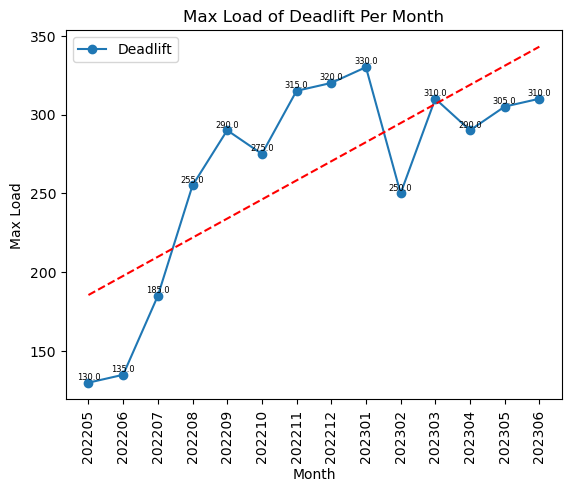

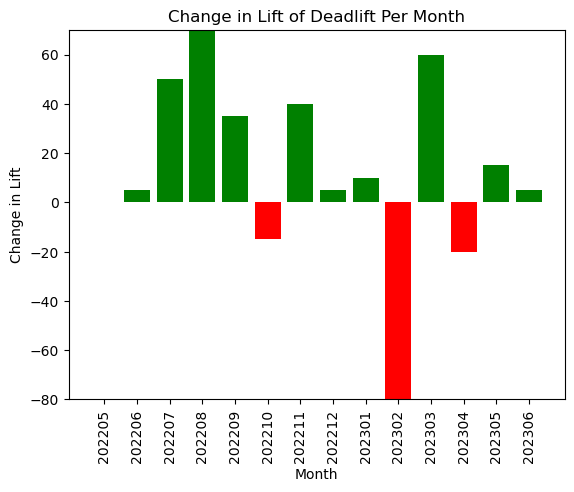

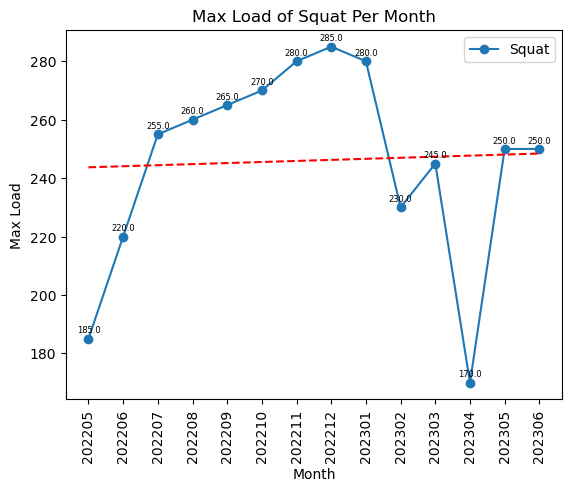

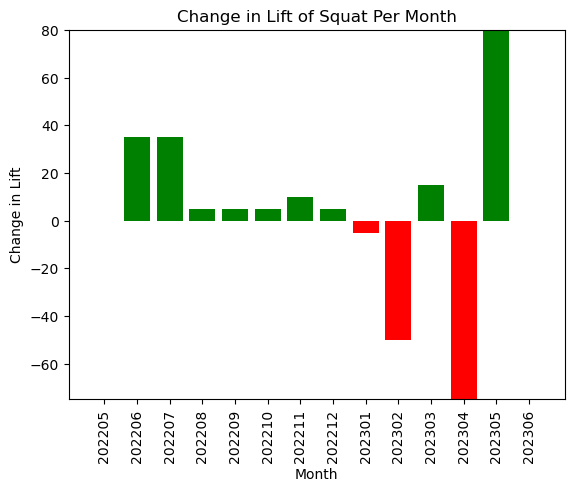

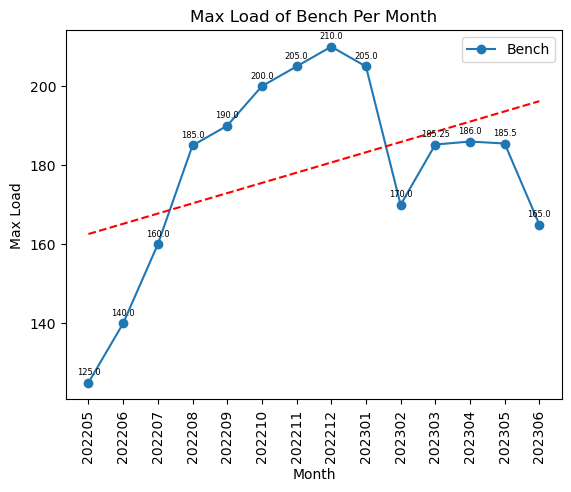

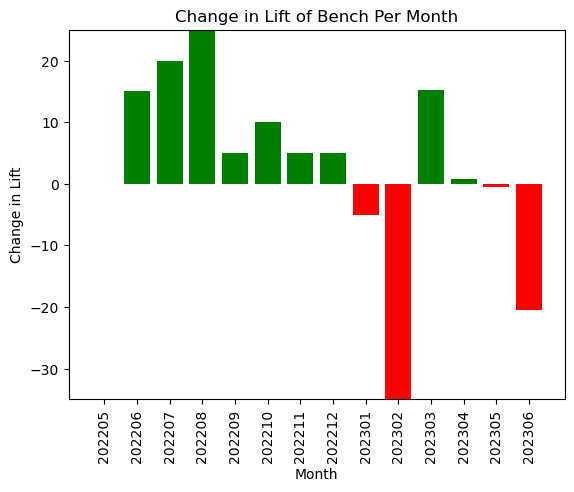

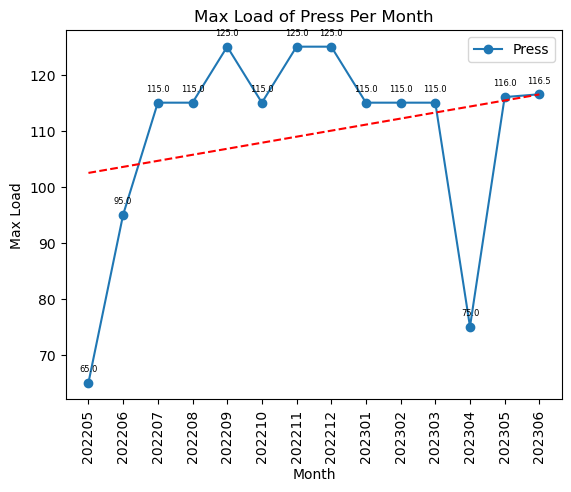

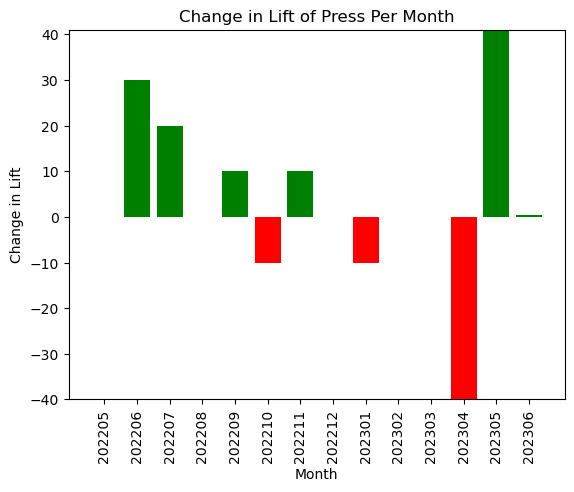

In [6]:
# Example usage:

# Assuming your DataFrame is named 'df_sets'
exercise_list = ['Deadlift', 'Squat', 'Bench', 'Press']

for exercise in exercise_list:
    plot_max_load_by_year_month(df_sets, exercise)
    plot_max_lift_change_per_year_month(df_sets, exercise)

## Latest Session

---

Well done, here is the summary from your latest session.

In [7]:
# this session you did ... 
latest_session_number = df_sets['Session'].max()
latest_session_df = df_sets[df_sets['Session'] == latest_session_number]
columns_to_keep = ['Date', 'Exercise', 'Load', 'Repetitions', 'Note', 'Volume']
latest_session_df[columns_to_keep].fillna(0)

,Date,Exercise,Load,Repetitions,Note,Volume
1839,2023-06-10,Squat,225.0,5.0,0,1125.0
1840,2023-06-10,Squat,225.0,5.0,0,1125.0
1841,2023-06-10,Squat,250.0,5.0,0,1250.0
1842,2023-06-10,Deadlift,155.0,10.0,0,1550.0
1843,2023-06-10,Deadlift,155.0,13.0,0,2015.0
1844,2023-06-10,Deadlift,155.0,12.0,0,1860.0
1845,2023-06-10,Deadlift,155.0,10.0,0,1550.0
1846,2023-06-10,Deadlift,155.0,10.0,That felt hard I may regret starting so heavy :S,1550.0
1847,2023-06-10,Abs,1.0,22.0,0,22.0
1848,2023-06-10,Abs,1.0,22.0,0,22.0


### Average Load Per Exercise this session

In [8]:
# Custom function to determine arrow direction
def arrow_direction(value):
    if value > 1:
        return '↑'  # Up arrow
    elif value < 1:
        return '↓'  # Down arrow
    else:
        return ''   # No arrow

# Create the arrow column


In [9]:
latest_session_df_sum = latest_session_df.groupby('Exercise')['Load'].mean()
latest_session_df_sum = latest_session_df_sum.to_frame()

previous_session_df = df_sets[df_sets['Session'] == latest_session_number-7]
previous_session_df_sum = previous_session_df.groupby('Exercise')['Load'].mean()
previous_session_df_sum = previous_session_df_sum.to_frame()

comparison_df = previous_session_df_sum.merge(latest_session_df_sum, how='left', on='Exercise').fillna(0)
comparison_df = comparison_df.rename(columns={'Load_x': 'Previous', 'Load_y': 'Current'})
comparison_df['Change'] = round((comparison_df['Current'] / comparison_df['Previous']),2)
comparison_df['Direction'] = comparison_df['Change'].apply(arrow_direction)
comparison_df['Change'] = comparison_df['Change'].apply(lambda x: '{:.0%}'.format(x))
comparison_df

,Previous,Current,Change,Direction
Exercise,,,,
Abs,1.000000,1.000000,100%,
Squat,183.071429,233.333333,127%,↑


### Total Volume Per Exercise this session

In [10]:
latest_session_df_sum = latest_session_df.groupby('Exercise')['Volume'].sum()
latest_session_df_sum = latest_session_df_sum.to_frame()

previous_session_df = df_sets[df_sets['Session'] == latest_session_number-7]
previous_session_df_sum = previous_session_df.groupby('Exercise')['Volume'].sum()
previous_session_df_sum = previous_session_df_sum.to_frame()

comparison_df = previous_session_df_sum.merge(latest_session_df_sum, how='left', on='Exercise').fillna(0)
comparison_df = comparison_df.rename(columns={'Volume_x': 'PreviousVol', 'Volume_y': 'CurrentVol'})
comparison_df['Change'] = round((comparison_df['CurrentVol'] / comparison_df['PreviousVol']),2)
comparison_df['Direction'] = comparison_df['Change'].apply(arrow_direction)
comparison_df['Change'] = comparison_df['Change'].apply(lambda x: '{:.0%}'.format(x))
comparison_df

,PreviousVol,CurrentVol,Change,Direction
Exercise,,,,
Abs,88.0,110.0,125%,↑
Squat,8927.5,3500.0,39%,↓


In [11]:
last_session_exercises = ['Squat']

# filter data for the same exercises
filtered_rows = df_sets[df_sets['Exercise'].isin(last_session_exercises)].copy()

# create new session number that shows all sessions for current list of workouts
filtered_rows.loc[:, 'Session2'] = filtered_rows.groupby(['Date']).ngroup()
filtered_rows = filtered_rows.fillna(0)

# get the max session for them 
latest_session_number = filtered_rows['Session2'].max()
latest_session_df = filtered_rows[filtered_rows['Session2'] == latest_session_number]

columns_to_keep = ['Date','Exercise', 'Load', 'Repetitions', 'Note', 'Volume']
latest_session_df[columns_to_keep].fillna(0)

print("3 Sessions Ago")

filtered_rows[filtered_rows['Session2'] == latest_session_number-3]

3 Sessions Ago


,Date,Exercise,Load,Repetitions,Note,Session,Volume,Session2
1728,2023-05-22,Squat,245.0,5.0,A - 3x5,137,1225.0,80
1729,2023-05-22,Squat,245.0,5.0,A - 3x5,137,1225.0,80
1730,2023-05-22,Squat,245.0,5.0,A - 3x5,137,1225.0,80


In [12]:
print("2 Sessions Ago")
filtered_rows[filtered_rows['Session2'] == latest_session_number-2]

2 Sessions Ago


,Date,Exercise,Load,Repetitions,Note,Session,Volume,Session2
1764,2023-05-30,Squat,250.0,4.0,A - 3x5,139,1000.0,81
1765,2023-05-30,Squat,250.0,5.0,A - 3x5,139,1250.0,81
1766,2023-05-30,Squat,250.0,5.0,A - 3x5,139,1250.0,81


In [13]:
print("1 Session Ago")
filtered_rows[filtered_rows['Session2'] == latest_session_number-1]

1 Session Ago


,Date,Exercise,Load,Repetitions,Note,Session,Volume,Session2
1798,2023-06-05,Squat,135.0,10.0,0,141,1350.0,82
1799,2023-06-05,Squat,135.0,10.0,0,141,1350.0,82
1800,2023-06-05,Squat,135.0,10.0,0,141,1350.0,82
1801,2023-06-05,Squat,135.0,10.0,0,141,1350.0,82
1802,2023-06-05,Squat,135.0,11.0,0,141,1485.0,82


In [14]:
print("Latest Session")
latest_session_df

Latest Session


,Date,Exercise,Load,Repetitions,Note,Session,Volume,Session2
1839,2023-06-10,Squat,225.0,5.0,0,143,1125.0,83
1840,2023-06-10,Squat,225.0,5.0,0,143,1125.0,83
1841,2023-06-10,Squat,250.0,5.0,0,143,1250.0,83


# End. 

In [15]:
# Save as HTML and Send via Email

In [16]:
import nbformat
from nbconvert import HTMLExporter

# Assuming your Jupyter Notebook file is named 'notebook.ipynb'
notebook_file = 'Analysis.ipynb'
output_file = 'Analysis.html'

# Read the notebook file
with open(notebook_file, 'r', encoding='utf-8') as file:
    notebook = nbformat.read(file, as_version=4)

# Configure the HTMLExporter
html_exporter = HTMLExporter()
html_exporter.exclude_input = True  # Hide code cells
html_exporter.exclude_output_prompt = True  # Hide output prompts

# Export the notebook to HTML
(body, resources) = html_exporter.from_notebook_node(notebook)

# Save the output to an HTML file
with open(output_file, 'w', encoding='utf-8') as file:
    file.write(body)


In [17]:
##################################################
# Email configuration
sender_email = 'noreply.email.updater.01@gmail.com'
receiver_email = 'phillip.hungerford@gmail.com'

# SMTP server configuration
smtp_server = 'smtp.gmail.com'
smtp_port = 587
smtp_username = 'noreply.email.updater.01@gmail.com'
smtp_password = 'zevuoayqgbaqrrjn'

##################################################
##################################################
##################################################

In [18]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

# Email configuration

subject = 'Workout Summary'
html_file = 'Analysis.html'

# Read the HTML file content
with open(html_file, 'r') as file:
    html_content = file.read()

# Create a multipart message
message = MIMEMultipart()
message['From'] = sender_email
message['To'] = receiver_email
message['Subject'] = subject

# Attach the HTML content
html_part = MIMEText(html_content, 'html')
message.attach(html_part)

# Send the email
with smtplib.SMTP(smtp_server, smtp_port) as server:
    server.starttls()
    server.login(smtp_username, smtp_password)
    server.sendmail(sender_email, receiver_email, message.as_string())

print('Email sent successfully!')

Email sent successfully!
